In [20]:
# only for test
from IPython import get_ipython
get_ipython().magic('reset -sf')  # clear cashes
import glob, os


print('Clearing cashes')
print(os.path.abspath('.'))




Clearing cashes
c:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition\src


In [68]:
# initialisation
import csv
import glob, os
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy import signal
from scipy.fft import fft, ifft, fftfreq, fftshift
import random


In [22]:
# csv reader (faster)
emg_1_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_2_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
emg_3_csv={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
actionList = ['d', 'u', 'l', 'r', 'f']


folderPath_hyq = os.path.abspath('./Dataset/new/hyqData/')
folderPath_zjh = os.path.abspath('./Dataset/new/zjhData/')
folderPath_sgf = os.path.abspath('./Dataset/new/sgfData/')

filePathList=[]
filePathList.append(glob.glob(os.path.join(folderPath_hyq, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_zjh, "*.csv")))
filePathList.append(glob.glob(os.path.join(folderPath_sgf, "*.csv")))
def knnForwardRegression(rawData, k):
    index = 0
    smoothData = []
    while index < len(rawData):
        sum = 0.0
        count = 0
        if index < k:
            smoothData.append(float(rawData[index]))
        else:
            while count < k:
                sum = sum + float(rawData[index - count])
                count = count + 1
            smoothData.append(sum/k)
        index = index + 1
    return smoothData

for filePathListIndex in filePathList:
    csvData={'d': [] , 'u': [], 'l': [], 'r': [], 'f': []}
    dl=[]
    print('Reading .csv:')
    for f in filePathListIndex:
        csvData[f[-5]] = pd.read_csv(f, header=None).values.tolist()
        print(f[-5])

    print(len(csvData['d']))
    print(len(csvData['u']))
    print(len(csvData['l']))
    print(len(csvData['r']))
    print(len(csvData['f']))
    print('Separating EMG signal channels:')
    for currentAction in actionList:
        print(currentAction)
        for row in range(len(csvData[currentAction])):
            emg_1_csv[currentAction].append(csvData[currentAction][row][0])
            emg_2_csv[currentAction].append(csvData[currentAction][row][1])
            emg_3_csv[currentAction].append(csvData[currentAction][row][2])



print('Lengths of each action: (down, up, left, right, and fist)')
# print(len(emg_1_csv['d']))
# print(len(emg_2_csv['d']))
# print(len(emg_3_csv['d']))
# print(len(emg_1_csv['u']))
# print(len(emg_2_csv['u']))
# print(len(emg_3_csv['u']))
# print(len(emg_1_csv['l']))
# print(len(emg_2_csv['l']))
# print(len(emg_3_csv['l']))
# print(len(emg_1_csv['r']))
# print(len(emg_2_csv['r']))
# print(len(emg_3_csv['r']))
# print(len(emg_1_csv['f']))
# print(len(emg_2_csv['f']))
# print(len(emg_3_csv['f']))
emg_1_csv['d']=knnForwardRegression(emg_1_csv['d'], 10)

emg_2_csv['d']=knnForwardRegression(emg_2_csv['d'], 10)

emg_3_csv['d']=knnForwardRegression(emg_3_csv['d'], 10)
emg_1_csv['f']=knnForwardRegression(emg_1_csv['f'], 10)
emg_2_csv['f']=knnForwardRegression(emg_2_csv['f'], 10)
emg_3_csv['f']=knnForwardRegression(emg_3_csv['f'], 10)
emg_1_csv['u']=knnForwardRegression(emg_1_csv['u'], 10)
emg_2_csv['u']=knnForwardRegression(emg_2_csv['u'], 10)
emg_3_csv['u']=knnForwardRegression(emg_3_csv['u'], 10)
emg_1_csv['l']=knnForwardRegression(emg_1_csv['l'], 10)
emg_2_csv['l']=knnForwardRegression(emg_2_csv['l'], 10)
emg_3_csv['l']=knnForwardRegression(emg_3_csv['l'], 10)
emg_1_csv['r']=knnForwardRegression(emg_1_csv['r'], 10)
emg_2_csv['r']=knnForwardRegression(emg_2_csv['r'], 10)
emg_3_csv['r']=knnForwardRegression(emg_3_csv['r'], 10)

Reading .csv:
d
f
l
r
u
16500
15600
17400
15600
15000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
d
f
l
r
u
30000
30000
30000
30000
30000
Separating EMG signal channels:
d
u
l
r
f
Reading .csv:
d
f
l
r
u
16500
15900
16200
13500
16500
Separating EMG signal channels:
d
u
l
r
f
Lengths of each action: (down, up, left, right, and fist)


[50]
Loading: d
210
210
210
Loading: u
205
205
205
Loading: l
212
212
212
Loading: r
197
197
197
Loading: f
205
205
205
209
203
197
190
187


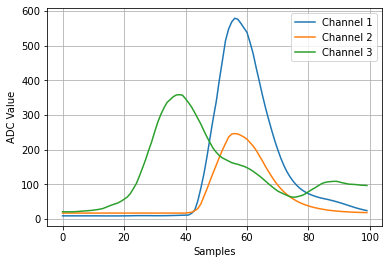

In [56]:

record_length=300
window_length=100
window_slice = [50]
# window_slice = [m for m in range(10,51,1)]
print(window_slice)

emg_1_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_2_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
emg_3_window={'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}

for actionIndex in range(len(actionList)):
    print('Loading: '+actionList[actionIndex])
  
    emg_1_slice = [emg_1_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_1_csv[actionList[actionIndex]]),record_length)]
    emg_2_slice = [emg_2_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_2_csv[actionList[actionIndex]]),record_length)]
    emg_3_slice = [emg_3_csv[actionList[actionIndex]][i:i+record_length] for i in range(0,len(emg_3_csv[actionList[actionIndex]]),record_length)]

    print(len(emg_1_slice))
    print(len(emg_2_slice))
    print(len(emg_3_slice))
    

    generatedIndex=0
    for i in range(len(emg_1_slice)):
        max_1 = emg_1_slice[i].index(max(emg_1_slice[i]))
        max_2 = emg_2_slice[i].index(max(emg_2_slice[i]))
        max_3 = emg_3_slice[i].index(max(emg_3_slice[i]))
        avgMax=int((max_1+max_2+max_3)/3)
        
        for window_slice_index in range(len(window_slice)):

            # if max_1>window_slice[window_slice_index] and max_1<record_length-window_slice[window_slice_index] and max_2>window_slice[window_slice_index] and max_2<record_length-window_slice[window_slice_index] and max_3>window_slice[window_slice_index] and max_3<record_length-window_slice[window_slice_index]:
            if avgMax>window_slice[window_slice_index] and avgMax<record_length-window_length+window_slice[window_slice_index]:
                emg_1_window[actionList[actionIndex]][generatedIndex] = emg_1_slice[i][avgMax-window_slice[window_slice_index]:avgMax+(window_length-window_slice[window_slice_index])]
                emg_2_window[actionList[actionIndex]][generatedIndex] = emg_2_slice[i][avgMax-window_slice[window_slice_index]:avgMax+(window_length-window_slice[window_slice_index])]
                emg_3_window[actionList[actionIndex]][generatedIndex] = emg_3_slice[i][avgMax-window_slice[window_slice_index]:avgMax+(window_length-window_slice[window_slice_index])]
                generatedIndex+=1
            
            # if len(emg_1_window[actionList[actionIndex]][generatedIndex-1]) != 100:
            #     print(len(emg_1_window[actionList[actionIndex]][generatedIndex-1]))

            




print(len(emg_1_window['d']))
print(len(emg_1_window['u']))
print(len(emg_1_window['l']))
print(len(emg_1_window['r']))
print(len(emg_1_window['f']))



plt.plot(emg_1_window['d'][0])
plt.plot(emg_2_window['d'][0])
plt.plot(emg_3_window['d'][0])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.grid()
plt.show()

In [29]:
def prep_highpass(sig):
    b, a = signal.butter(3, 3/50, 'highpass')
    w, h = signal.freqs(b,a)
    # plt.semilogx(w, 20 * np.log10(abs(h)))

    filtered = signal.filtfilt(b,a,sig)
    
    
    # fft_filtered = fft(filtered)
    return filtered
    # plt.plot(emg_1)
    # plt.plot(abs(fft_filtered))


def tfd_stft(sig):
    f, t, Zxx = signal.stft(SyntaxWarning, 100, nperseg=10)
    plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
    return Zxx
    

In [57]:
# feature extraction

from tools import getSmoothedList
def knnForwardRegression(rawData, k):
    index = 0
    smoothData = []
    while index < len(rawData):
        sum = 0.0
        count = 0
        if index < k:
            smoothData.append(float(rawData[index]))
        else:
            while count < k:
                sum = sum + float(rawData[index - count])
                count = count + 1
            smoothData.append(sum/k)
        index = index + 1
    return smoothData
featureDict = {'d': {} , 'u': {}, 'l': {}, 'r': {}, 'f': {}}
featureList = []

fs = 100 # sample frequency
T = 1/fs # sample rate


for actionIndex in range(len(actionList)):
    emg_1=[]
    emg_2=[]
    emg_3=[]
    print(actionList[actionIndex])
    for row in range(len(emg_1_window[actionList[actionIndex]])):
        emg_1=knnForwardRegression(emg_1_window[actionList[actionIndex]][row], 10)
        emg_2=knnForwardRegression(emg_2_window[actionList[actionIndex]][row], 10)
        emg_3=knnForwardRegression(emg_3_window[actionList[actionIndex]][row], 10)
        if len(emg_1) != window_length:
            print(actionList[actionIndex])
            print(row)
        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0

        # some temporary variables

        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0

        freqs_temp1, psd_temp1 = signal.welch(prep_highpass(emg_1), fs)
        freqs_temp2, psd_temp2 = signal.welch(prep_highpass(emg_2), fs)
        freqs_temp3, psd_temp3 = signal.welch(prep_highpass(emg_3), fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0

        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))

            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2

            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1

        mav_emg_1 = abs_sum_temp1/len(emg_1)
        mav_emg_2 = abs_sum_temp2/len(emg_2)
        mav_emg_3 = abs_sum_temp3/len(emg_3)

        rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
        rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
        rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))

        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]

        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]

        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)

        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
        
#         print('check')
#         featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
#                                                             wl_emg_1, wl_emg_2, wl_emg_3, 
#                                                             ssc_emg_1, ssc_emg_2, ssc_emg_3, 
#                                                             rms_emg_1, rms_emg_2, rms_emg_3]
        featureDict[actionList[actionIndex]][row] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                            wl_emg_1, wl_emg_2, wl_emg_3, 
                                                            ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                            rms_emg_1, rms_emg_2, rms_emg_3, 
                                                            meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                            medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                            meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                            vcf_emg_1, vcf_emg_2, vcf_emg_3]
        # print(featureDict[actionList[actionIndex]][row])




print('Loading completed')

d
u
l
r
f
Loading completed


[123.73, 62.42, 130.3, 1042, 428, 642, 43, 47, 16, 207.87941216003088, 93.03665944131915, 162.01376484731165, 3.565236773300239, 3.558475823431199, 3.5579134016437113, 46.0, 37.0, 11.0, 43.33830959420478, 6.735707297311855, 7.807919760041564, 0.9014047300943773, 0.9358258984352474, 0.6577465170733987]
(209, 24)
(203, 24)
(197, 24)
(190, 24)
(187, 24)


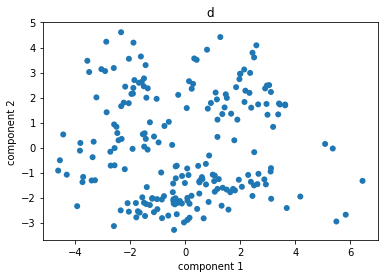

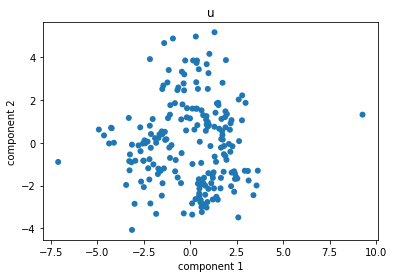

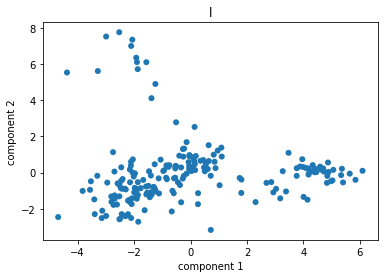

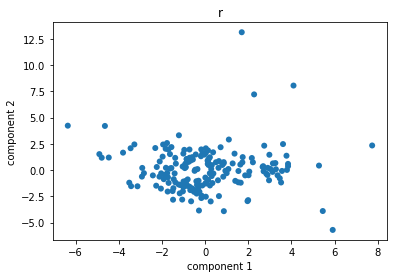

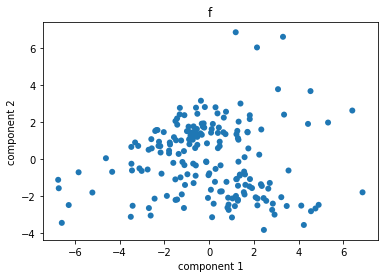

In [58]:
# PCA for individual movement

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
print(featureDict['d'][0])


d_list=[]
u_list=[]
r_list=[]
l_list=[]
f_list=[]

for i in range(len(featureDict['d'])):
    d_list.append(featureDict['d'][i])
for i in range(len(featureDict['u'])):
    u_list.append(featureDict['u'][i])
for i in range(len(featureDict['l'])):
    l_list.append(featureDict['l'][i])
for i in range(len(featureDict['r'])):
    r_list.append(featureDict['r'][i])
for i in range(len(featureDict['f'])):
    f_list.append(featureDict['f'][i])
d_array = np.array(d_list)
u_array = np.array(u_list)
l_array = np.array(l_list)
r_array = np.array(r_list)
f_array = np.array(f_list)
print(d_array.shape)
print(u_array.shape)
print(l_array.shape)
print(r_array.shape)
print(f_array.shape)

# normalisation
scaler = StandardScaler().fit(d_array)
d_scaled = scaler.transform(d_array)
d_scaled.mean(axis=0)
# d_scaled2 = normalize(d_array, axis = 0)
# print(d_scaled[0])
# print(d_scaled.mean(axis=0), d_scaled.std(axis=0))
scaler = StandardScaler().fit(u_array)
u_scaled = scaler.transform(u_array)
u_scaled.mean(axis=0)
scaler = StandardScaler().fit(l_array)
l_scaled = scaler.transform(l_array)
l_scaled.mean(axis=0)
scaler = StandardScaler().fit(r_array)
r_scaled = scaler.transform(r_array)
r_scaled.mean(axis=0)
scaler = StandardScaler().fit(f_array)
f_scaled = scaler.transform(f_array)
f_scaled.mean(axis=0)


pca = PCA(n_components=2)
principalComponents_d = pca.fit_transform(d_scaled)
principalComponents_u = pca.fit_transform(u_scaled)
principalComponents_l = pca.fit_transform(l_scaled)
principalComponents_r = pca.fit_transform(r_scaled)
principalComponents_f = pca.fit_transform(f_scaled)
# print(principalComponents_d.shape)

plt.scatter(
            principalComponents_d[:, 0], principalComponents_d[:, 1],
            edgecolor='none', alpha=1
            # c=digits.target, edgecolor='none', alpha=0.5,
            # cmap=plt.cm.get_cmap('spectral', 10)
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('d')
plt.show()
plt.scatter(
            principalComponents_u[:, 0], principalComponents_u[:, 1],
            edgecolor='none', alpha=1
            # c=digits.target, edgecolor='none', alpha=0.5,
            # cmap=plt.cm.get_cmap('spectral', 10)
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('u')
plt.show()
plt.scatter(
            principalComponents_l[:, 0], principalComponents_l[:, 1],
            edgecolor='none', alpha=1
            # c=digits.target, edgecolor='none', alpha=0.5,
            # cmap=plt.cm.get_cmap('spectral', 10)
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('l')
plt.show()
plt.scatter(
            principalComponents_r[:, 0], principalComponents_r[:, 1],
            edgecolor='none', alpha=1
            # c=digits.target, edgecolor='none', alpha=0.5,
            # cmap=plt.cm.get_cmap('spectral', 10)
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('r')
plt.show()
plt.scatter(
            principalComponents_f[:, 0], principalComponents_f[:, 1],
            edgecolor='none', alpha=1
            # c=digits.target, edgecolor='none', alpha=0.5,
            # cmap=plt.cm.get_cmap('spectral', 10)
            )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('f')
plt.show()

# import seaborn as sns
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="principal component 1", y="principal component 2",
#     hue="y",
#     palette=sns.color_palette("hls", 5),
#     data=principalComponents_d,
#     legend="full",
#     alpha=0.3
# )

42.68
[123.73, 62.42, 130.3, 1042, 428, 642, 43, 47, 16, 207.87941216003088, 93.03665944131915, 162.01376484731165, 3.565236773300239, 3.558475823431199, 3.5579134016437113, 46.0, 37.0, 11.0, 43.33830959420478, 6.735707297311855, 7.807919760041564, 0.9014047300943773, 0.9358258984352474, 0.6577465170733987]
(986, 25)
(986,)
(986, 2)


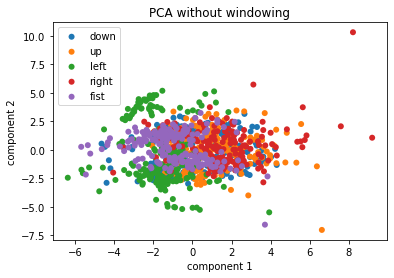

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
print(featureDict['f'][0][0])
all_list=[]
label=[]
print(featureDict['d'][0])
for index in range(len(actionList)):
    for i in range(len(featureDict[actionList[index]])):
        temp=[]
        temp.extend(featureDict[actionList[index]][i])
        temp.append(index)
        all_list.append(temp)
        label.append(index)
all_array = np.array(all_list)
label_array = np.array(label)
print(all_array.shape)
print(label_array.shape)


scaler = StandardScaler().fit(all_array)
all_array = scaler.transform(all_array)
all_array.mean(axis=0)

pca = PCA(n_components=2)
principalComponents_all = pca.fit_transform(all_array)
print(principalComponents_all.shape)

for label in np.unique(label_array):
    plt.scatter(
                principalComponents_all[label_array==label, 0], principalComponents_all[label_array==label, 1],
                edgecolor='none', alpha=1,
                label = label
                # c=digits.target, edgecolor='none', alpha=0.5,
                # cmap=plt.cm.get_cmap('spectral', 5)
                )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('PCA without windowing')
plt.legend(['down', 'up','left','right','fist'])

# import seaborn as sns
# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="principal component 1", y="principal component 2",
#     hue="y",
#     palette=sns.color_palette("hls", 5),
#     data=principalComponents_all,
#     legend="full",
#     alpha=0.3
# )


In [60]:
# create labels for data samples
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv1D, BatchNormalization
from keras.utils import np_utils,normalize
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(1234)


x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'd': 0,
        'u': 1,
        'l': 2,
        'r': 3,
        'f': 4
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['d', 'u', 'l', 'r', 'f']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)

# x_val_array = normalize(x_val_array, axis = 1)

state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)





(591, 24)
(591, 5)
(198, 24)
(198, 5)
(197, 24)
(197, 5)


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 128)               3200      
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dense_24 (Dense)             (None, 100)               12900     
_________________________________________________________________
batch_normalization_15 (Batc (None, 100)               400       
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 505       
Total params: 17,517
Trainable params: 17,061
Non-trainable params: 456
_________________________________________________________________
Epoch 1/100
6/6 [==============================] - 0s 47ms/step - loss: 1.9033 - accuracy: 0.2572 - val_loss: 5.10

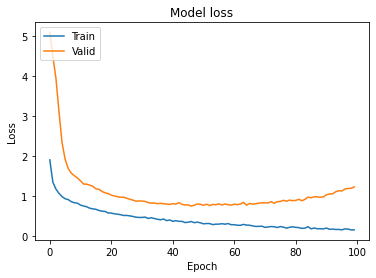

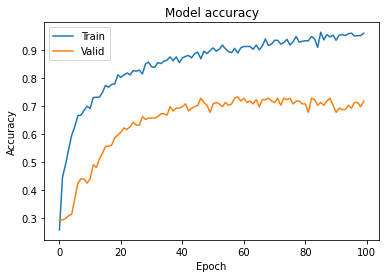

Test loss: 0.7852870225906372
Test accuracy: 0.7512690424919128


In [61]:
# Model

model = Sequential()
# model.add(Conv1D(32, kernel_size = 3, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
# model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
# model.add(Dropout(0.1))
# model.add(BatchNormalization())
# model.add(Dense(250, activation='relu', kernel_initializer='he_normal'))
# model.add(BatchNormalization())
# model.add(Dense(250, activation='relu', kernel_initializer='he_normal'))

model.add(Dense(5, activation='softmax'))

model.summary()
# opt = RMSprop(lr=0.1, decay=1e-6)
early_stop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=100, verbose=0, mode='max', baseline=None, restore_best_weights=True)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=100, batch_size=100, verbose=1, validation_data=(x_validate, y_validate_class), callbacks=[early_stop])

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [39]:
from keras.models import load_model

model.save('test2.h5')

In [52]:
# manual test using test set
num = random.randint(0,len(x_test))

testOnly=x_test[num].reshape(1,len(x_test[random.randint(0,len(x_test))]))
print(testOnly)
print(y_test[num])
predictResult = model.predict(testOnly)

# manual test using random samples
# randomSample = [random.random() for m in range(0,24)]
# randomSample = np.array(randomSample).reshape(1,24)
# print(randomSample)
# predictResult = model.predict(randomSample)

print(np.argmax(predictResult))
print(np.amax(predictResult))
print(predictResult)

[[1.76183333e+02 1.06541667e+02 1.48708333e+02 5.27000000e+02
  2.89000000e+02 2.80000000e+02 7.00000000e+00 4.00000000e+01
  4.40000000e+01 1.93693658e+02 1.16223599e+02 1.56676285e+02
  3.61655755e+00 3.74049567e+00 2.97166221e+00 2.83333333e+01
  2.66666667e+01 1.83333333e+01 6.19961340e-01 3.90256069e-01
  3.49821405e-01 1.63657119e+00 1.30606811e+00 1.11827741e+00]]
[4]
4
0.5202199
[[0.00910422 0.46493512 0.0051681  0.00057262 0.5202199 ]]


In [85]:
# del model
# model = load_model('ann.h5')
folderPath_hyq = os.path.abspath('./Dataset/rt')
filePathList=[]
filePathList.append(glob.glob(os.path.join(folderPath_hyq, "*.csv")))
for filePathListIndex in filePathList:
    for f in filePathListIndex:
        data = pd.read_csv(f, header=None).values.tolist()

print(len(data))

# predictResult = model.predict(randomSample)
# for i in range(predictResult.shape[1]):
#     print(predictResult[0][i])

# print(model.predict(randomSample).shape[1])

100


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = (model.predict(x_train) == 1)
y_test_pred = (model.predict(x_test) == 1)
print(y_test_pred[0])
print(y_test_pred.shape)


# conf_mx = confusion_matrix(y_train, y_train_pred.argmax(axis=1))
conf_mx = confusion_matrix(y_test, y_test_pred.argmax(axis=1))
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)


plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
print(len(emg_3_window['l']))            
plt.plot(emg_1_window['d'][100])
plt.plot(emg_2_window['d'][100])
plt.plot(emg_3_window['d'][100])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.title('d')
plt.grid()
plt.show()
plt.plot(emg_1_window['u'][100])
plt.plot(emg_2_window['u'][100])
plt.plot(emg_3_window['u'][100])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.title('u')
plt.grid()
plt.show()
plt.plot(emg_1_window['l'][12])
plt.plot(emg_2_window['l'][12])
plt.plot(emg_3_window['l'][12])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.title('l')
plt.grid()
plt.show()
plt.plot(emg_1_window['r'][100])
plt.plot(emg_2_window['r'][100])
plt.plot(emg_3_window['r'][100])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.title('r')
plt.grid()
plt.show()
plt.plot(emg_1_window['f'][50])
plt.plot(emg_2_window['f'][50])
plt.plot(emg_3_window['f'][50])
plt.legend(['Channel 1', 'Channel 2', 'Channel 3'])
plt.xlabel('Samples')
plt.ylabel('ADC Value')
plt.title('f')
plt.grid()
plt.show()